In [22]:
import wave
import matplotlib.pyplot as plt
import librosa
import numpy as np

In [24]:
# Get the audio and its elements
audio, sample_freq = librosa.load('tmp.mp3')
num_samples = audio.shape[0]
t_audio = num_samples/sample_freq

In [20]:
print(f"Number of samples: {num_samples}")
print(f"Sample rate: {sample_freq}")
print(f"Total audio file time: {t_audio}")

Number of samples: 95256
Sample rate: 22050
Total audio file time: 4.32


In [23]:
# Time linspace for plotting
times = np.linspace(0, t_audio, num=num_samples)

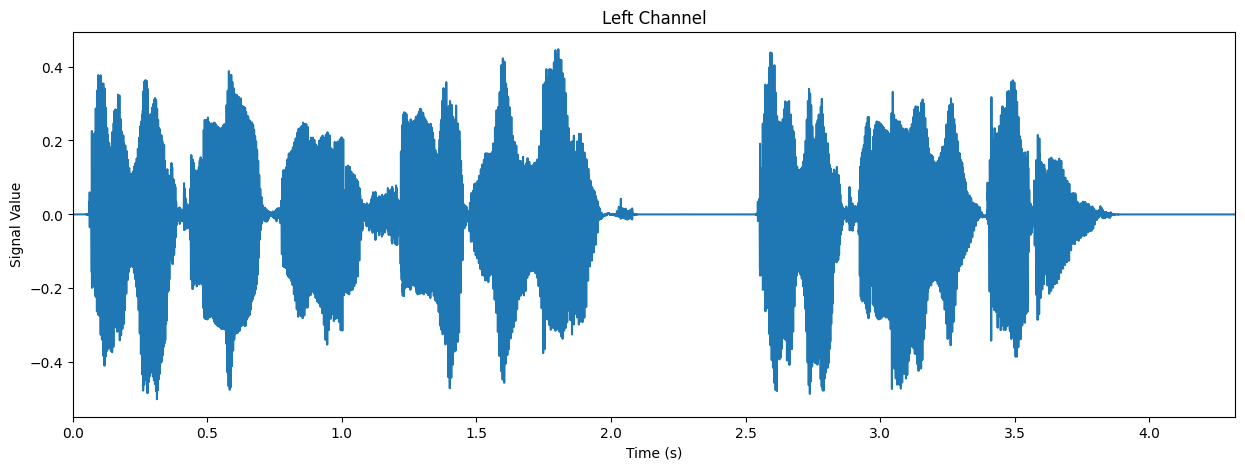

In [26]:
# Plot the audio
plt.figure(figsize=(15, 5))
plt.plot(times, audio)
plt.title('Left Channel')
plt.ylabel('Signal Value')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio)
plt.show()

In [53]:
# I really don't feel like pooling words out of there, so I'm going to use a library.
# The models for this library can be found here: https://alphacephei.com/vosk/models
from vosk import Model, KaldiRecognizer, SetLogLevel
from pydub import AudioSegment
import wave
import json

In [95]:
# Load in the model
model_path = "vosk_models/vosk-model-small-en-us-0.15"
model = Model(model_path)

In [96]:
# Make the audio a wav file
f = AudioSegment.from_mp3("tmp.mp3")
f.export("tmp.wav", format="wav")

<_io.BufferedRandom name='tmp.wav'>

In [103]:
# Read in the audio
wf = wave.open("tmp.wav", "rb")

In [104]:
# Prepare the model for rekognition
rec = KaldiRecognizer(model, wf.getframerate())
rec.SetWords(True)

In [105]:
wf.getframerate()

24000

In [106]:
# get the list of JSON dictionaries
results = []
# recognize speech using vosk model
data = wf.readframes(wf.getnframes())
while len(data) > 0:
    if rec.AcceptWaveform(data):
        part_result = json.loads(rec.Result())
        results.append(part_result)
    data = wf.readframes(wf.getnframes())
part_result = json.loads(rec.FinalResult())
results.append(part_result)

In [107]:
results

[{'result': [{'conf': 1.0, 'end': 0.18, 'start': 0.06, 'word': 'i'},
   {'conf': 1.0, 'end': 0.45, 'start': 0.18, 'word': 'want'},
   {'conf': 1.0, 'end': 0.51, 'start': 0.45, 'word': 'to'},
   {'conf': 1.0, 'end': 0.78, 'start': 0.51, 'word': 'meet'},
   {'conf': 1.0, 'end': 0.96, 'start': 0.78, 'word': 'you'},
   {'conf': 1.0, 'end': 1.11, 'start': 0.96, 'word': 'and'},
   {'conf': 1.0, 'end': 1.32, 'start': 1.11, 'word': 'see'},
   {'conf': 1.0, 'end': 1.5, 'start': 1.32, 'word': 'what'},
   {'conf': 0.733282, 'end': 1.68, 'start': 1.5, 'word': "you're"},
   {'conf': 1.0, 'end': 2.1, 'start': 1.68, 'word': 'like'},
   {'conf': 1.0, 'end': 2.67, 'start': 2.52, 'word': 'i'},
   {'conf': 1.0, 'end': 2.91, 'start': 2.67, 'word': 'want'},
   {'conf': 1.0, 'end': 3.0, 'start': 2.91, 'word': 'to'},
   {'conf': 1.0, 'end': 3.18, 'start': 3.0, 'word': 'know'},
   {'conf': 1.0, 'end': 3.36, 'start': 3.18, 'word': 'you'},
   {'conf': 1.0, 'end': 3.84, 'start': 3.36, 'word': 'better'}],
  'text